In [1]:
#pip install seaborn

# Import Libraries

In [44]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV and Perform Basic Data Cleaning

In [45]:
# Raw dataset drop NA
df = pd.read_csv("../resources/train_predict.csv")
# Drop the null columns where all values are null
df1 = df.dropna(axis='columns', how='all')
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
#Reviewing the % of null values
100*df1.isnull().sum()/df.shape[0]

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [47]:
# Drop the null rows data cleaning, making all column headers lowercase
loan_df = df.dropna()
loan_df.columns=df.columns.str.lower()
loan_df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [48]:
#Update column names
loan_df.columns=['loan_id', 'gender', 'married', 'dependents', 'education','self_employed'
            , 'income', 'co_income'
            , 'loan_amount', 'loan_term', 'credit_history', 'property_area', 'loan_status']

In [49]:
#Test data_df after drop NAN
loan_df.dtypes

loan_id            object
gender             object
married            object
dependents         object
education          object
self_employed      object
income              int64
co_income         float64
loan_amount       float64
loan_term         float64
credit_history    float64
property_area      object
loan_status        object
dtype: object

In [50]:
loan_df.shape

(480, 13)

In [51]:
#Reviewing data
loan_df['dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [52]:
#Reviewing data
loan_df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [53]:
#Reviewing data
loan_df['loan_term'].unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

In [54]:
#Reviewing data
loan_df['credit_history'].unique()

array([1., 0.])

In [55]:
loan_df.describe()

,income,co_income,loan_amount,loan_term,credit_history
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


# Select your features (columns)

In [56]:
# Set features. This will also be used as your x values. Removed 'loan_id', 'property_area'
loan_features_df = loan_df[['gender', 'married', 'dependents', 'education','self_employed'
            , 'income', 'co_income'
            , 'loan_amount', 'loan_term', 'credit_history', 'loan_status']]
loan_features_df.head()

,gender,married,dependents,education,self_employed,income,co_income,loan_amount,loan_term,credit_history,loan_status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y


<AxesSubplot:xlabel='count', ylabel='gender'>

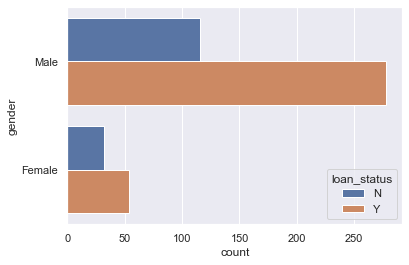

In [86]:
sns.countplot(y='gender', hue ='loan_status',data =loan_features_df)

<AxesSubplot:xlabel='count', ylabel='married'>

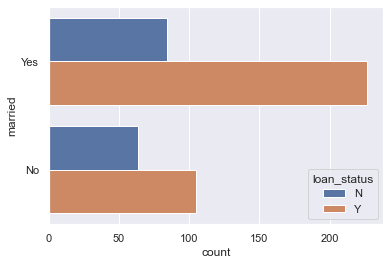

In [82]:
sns.countplot(y='married', hue ='loan_status',data =loan_features_df)

<AxesSubplot:xlabel='count', ylabel='credit_history'>

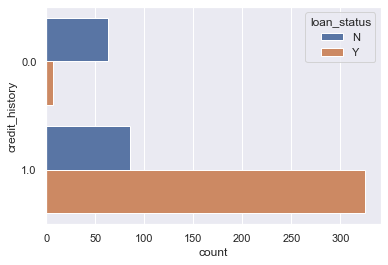

In [85]:
sns.countplot(y='credit_history', hue ='loan_status',data =loan_features_df)

<AxesSubplot:xlabel='count', ylabel='loan_term'>

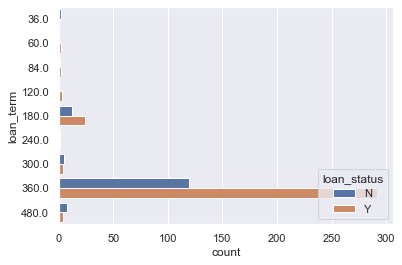

In [87]:
sns.countplot(y='loan_term', hue ='loan_status',data =loan_features_df)

# Create a Train Test Split

Use `loan_status` for the y values

In [120]:
y = loan_features_df[["loan_status"]] 
X = loan_features_df.drop(columns=["loan_status"])
print(X.shape, y.shape)

(480, 10) (480, 1)


In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [122]:
# encoded_df = pd.get_dummies(X, columns=["gender", "married", "education","self_employed"])
# encoded_df.head()

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [124]:
#code to numberic  Hold->  ‘Urban’: 3, ‘Semiurban’: 2,’Rural’: 1,
code_numeric = {'Female': 1, 'Male': 2,'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2, 'Y': 1, 'N': 0, '3+': 3}

In [125]:
loan_features_df = loan_features_df.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [126]:
loan_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          480 non-null    int64  
 1   married         480 non-null    int64  
 2   dependents      480 non-null    object 
 3   education       480 non-null    int64  
 4   self_employed   480 non-null    int64  
 5   income          480 non-null    int64  
 6   co_income       480 non-null    float64
 7   loan_amount     480 non-null    float64
 8   loan_term       480 non-null    float64
 9   credit_history  480 non-null    float64
 10  loan_status     480 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 65.0+ KB


# Pre-processing

Scale the data and perform some feature selection

In [150]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [156]:
# Scale Data
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)


In [157]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [158]:
# Scale Data
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

c:\users\dawn\anaconda3\envs\pythonadv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Train the Model


In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=500, activation='relu', input_dim=10))
# model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [177]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 500)               5500      
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 1002      
Total params: 6,502
Trainable params: 6,502
Non-trainable params: 0
_________________________________________________________________


In [178]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [179]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 360 samples
Epoch 1/100
360/360 - 1s - loss: 0.5997 - accuracy: 0.7694
Epoch 2/100
360/360 - 0s - loss: 0.5156 - accuracy: 0.7972
Epoch 3/100
360/360 - 0s - loss: 0.4828 - accuracy: 0.7972
Epoch 4/100
360/360 - 0s - loss: 0.4665 - accuracy: 0.8111
Epoch 5/100
360/360 - 0s - loss: 0.4621 - accuracy: 0.8056
Epoch 6/100
360/360 - 0s - loss: 0.4542 - accuracy: 0.8083
Epoch 7/100
360/360 - 0s - loss: 0.4508 - accuracy: 0.8111
Epoch 8/100
360/360 - 0s - loss: 0.4481 - accuracy: 0.8056
Epoch 9/100
360/360 - 0s - loss: 0.4428 - accuracy: 0.8194
Epoch 10/100
360/360 - 0s - loss: 0.4356 - accuracy: 0.8167
Epoch 11/100
360/360 - 0s - loss: 0.4343 - accuracy: 0.8250
Epoch 12/100
360/360 - 0s - loss: 0.4301 - accuracy: 0.8278
Epoch 13/100
360/360 - 0s - loss: 0.4276 - accuracy: 0.8278
Epoch 14/100
360/360 - 0s - loss: 0.4199 - accuracy: 0.8361
Epoch 15/100
360/360 - 0s - loss: 0.4172 - accuracy: 0.8306
Epoch 16/100
360/360 - 0s - loss: 0.4144 - accuracy: 0.8333
Epoch 17/100
360/360 - 0s - 

In [180]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train.values.ravel())

print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7972222222222223
Testing Data Score: 0.8416666666666667


In [181]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.05      0.10        37
           1       0.70      0.99      0.82        83

    accuracy                           0.70       120
   macro avg       0.68      0.52      0.46       120
weighted avg       0.69      0.70      0.60       120



# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [182]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 2, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.750, total=  54.6s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   54.5s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.722, total= 2.0min
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.9min remaining:    0.0s


In [ ]:
#print params, scores
print(grid.best_params_)
print(grid.best_score_)

# Save the Model

In [10]:
import joblib

In [13]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
filename = 'finalized_Plant_model1.sav'
joblib.dump(model, filename)
 


NameError: name 'model' is not defined

In [12]:
#To be done later
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test_categorical)
print(result)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets